# Tutorial Notebook to Use Clustering Methods on Synthetic X-ray Data

In [1]:
#imports

import SimDAT2D.SimDAT2D as sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IsoDAT2D.IsoDAT2D as iso # import IsoDat2D as iso
from PIL import Image
import pyFAI, fabio
from pyFAI.gui import jupyter
import pyFAI
import os
import matplotlib.pyplot as plt
import masking
import cupy
import nimfa

In [2]:
#masking algoirthm to create masks for the data

def make_masks(array, slices, offset = 5, width=.5, gits = False):
    masks = []
    mask_2048 = np.zeros((2048, 2048), dtype=bool)
    mask_2048[1024:] = True
    for i in slices:
        masks.append(masking.generate_mask_slices(array, width, i, offset = offset))
        print('Mask with {} slices created'.format(i))
        if gits == True:
            gits_masks = []
            for i in range(len(masks)):
                masks_p = masks[i] + mask_2048
                gits_masks.append(masks_p)
                plt.imshow(masks_p)
    return gits_masks

Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
Ni


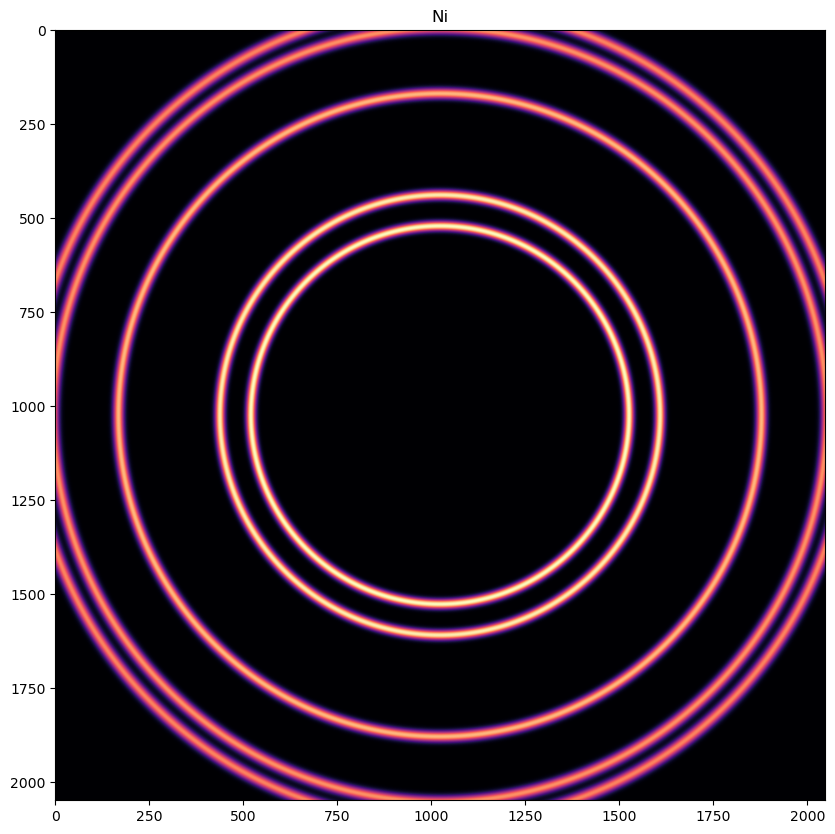

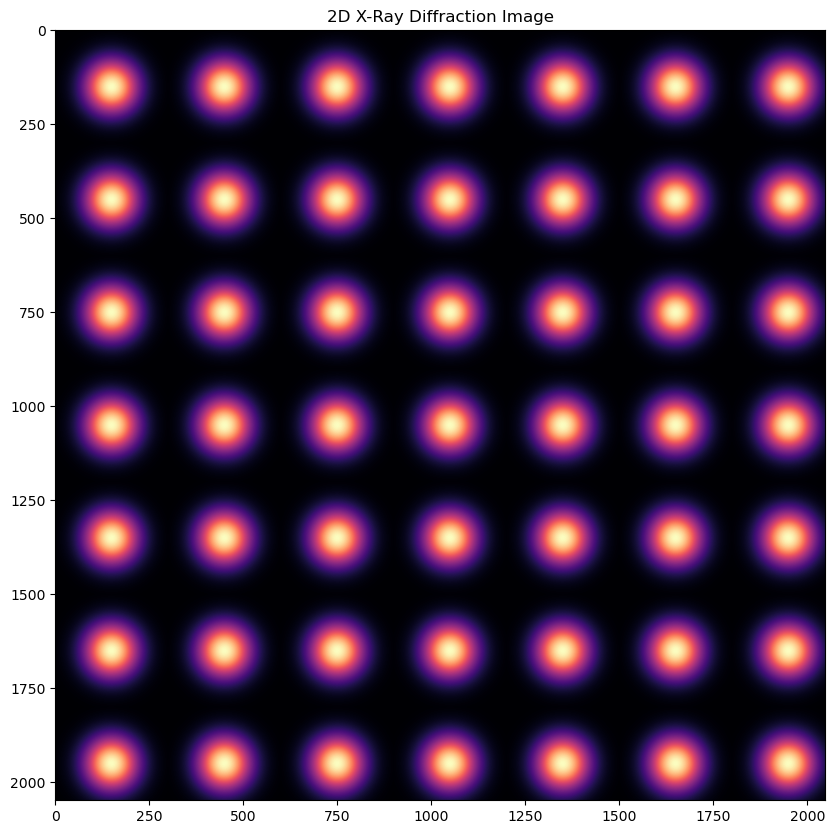

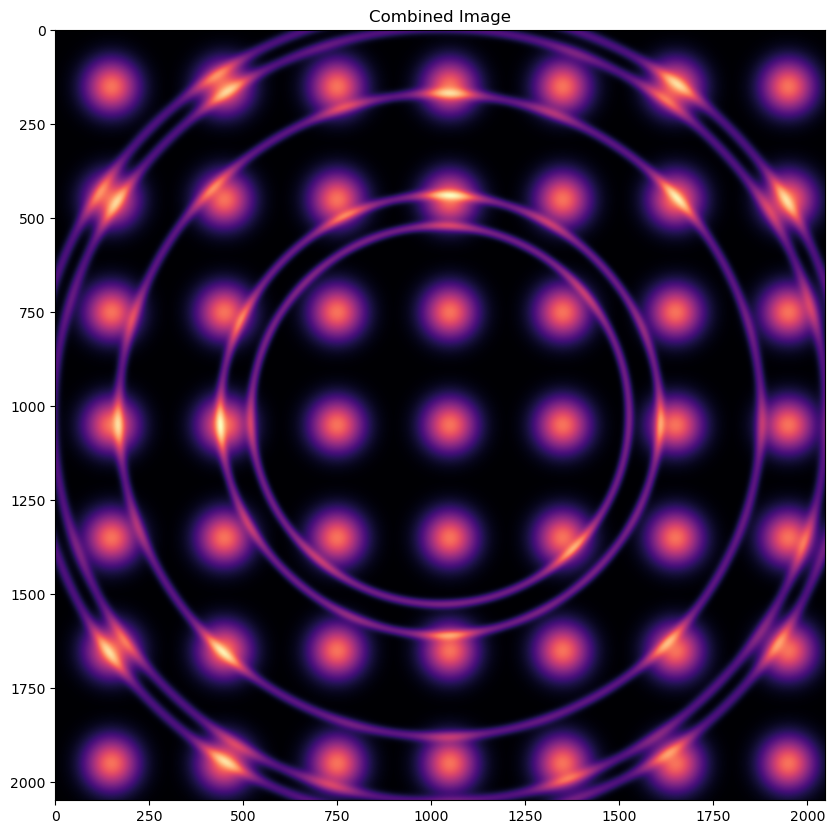

In [3]:
#creating synthetic data

#For ring creation
isotropic_signal = sim.create_isotropic(.4, .5e-10, cmap = 'magma')
#For spot creation
anisotropic_signal = sim.create_anisotropic(25, 50, 300, 300, cmap = 'magma')
#combining signals 
thin_film = sim.combine_image(isotropic_signal, anisotropic_signal*2, cmap= 'magma')

## Creating multiple masks for integration

[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.00017100544677]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

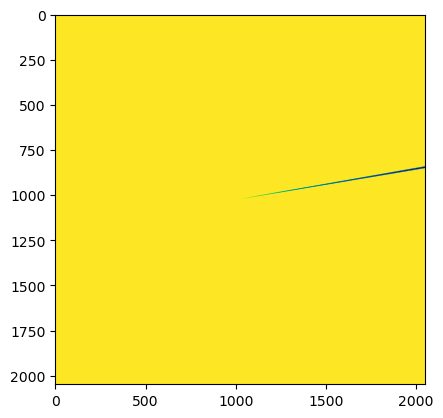

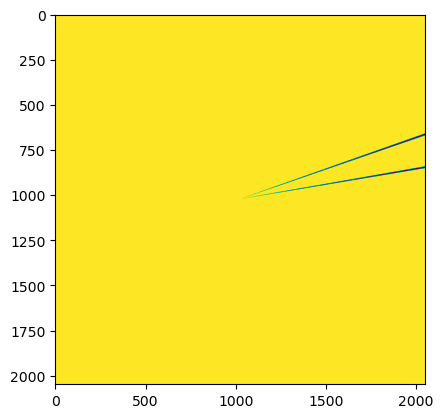

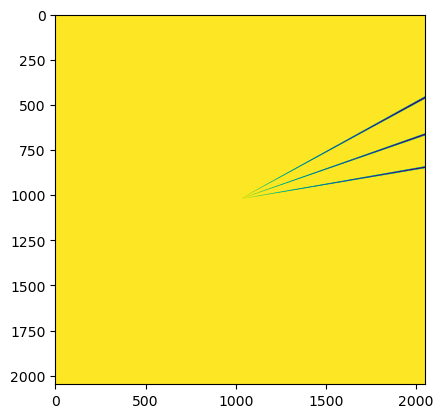

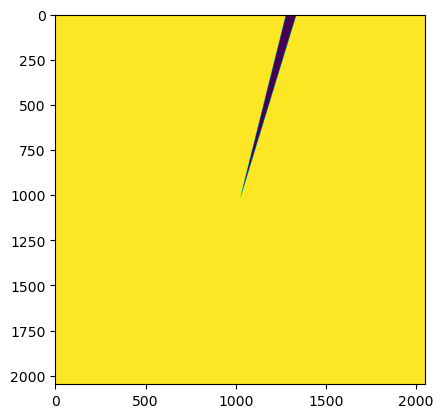

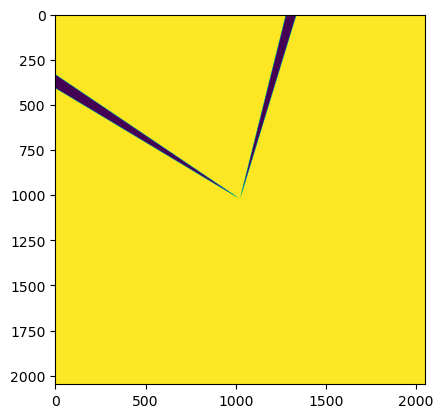

In [4]:
array, ai_pe = masking.make_chi_array(thin_film, .4, .5e-10)
masks = make_masks(array, [1,2,3], offset = 9, width = .5, gits = True)
masks_v2 = make_masks(array, [1,2], offset = 70, width = 3, gits = True)
mask_one = masks[0] 
mask_two = masks[1] 
mask_three = masks[2] 
mask_four = masks_v2[0] 
mask_five = masks_v2[1]

## Checking 'Ground Truth'

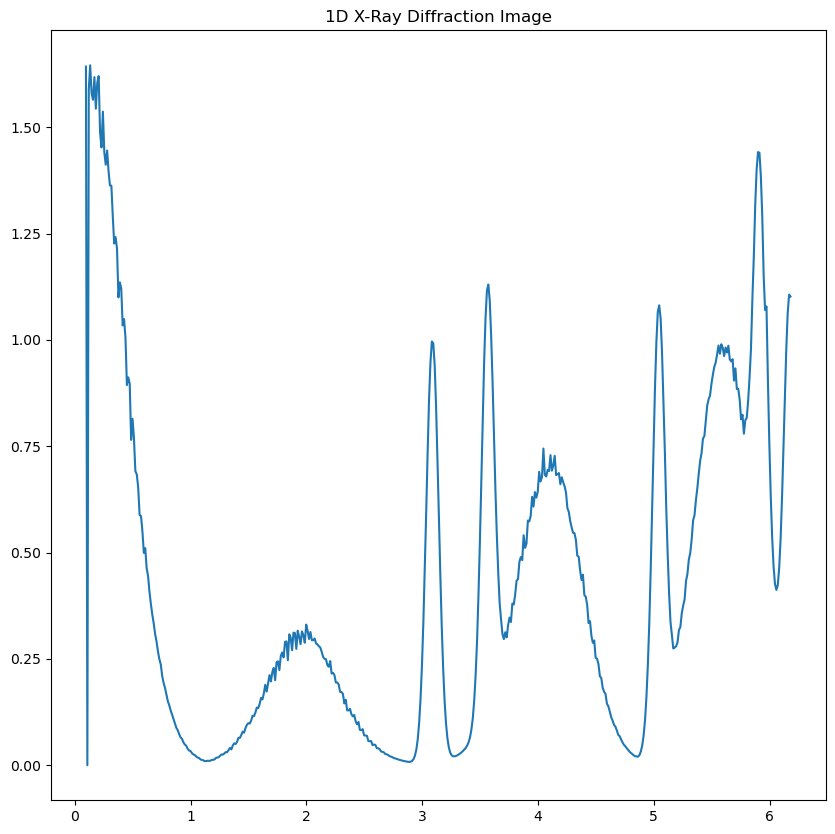

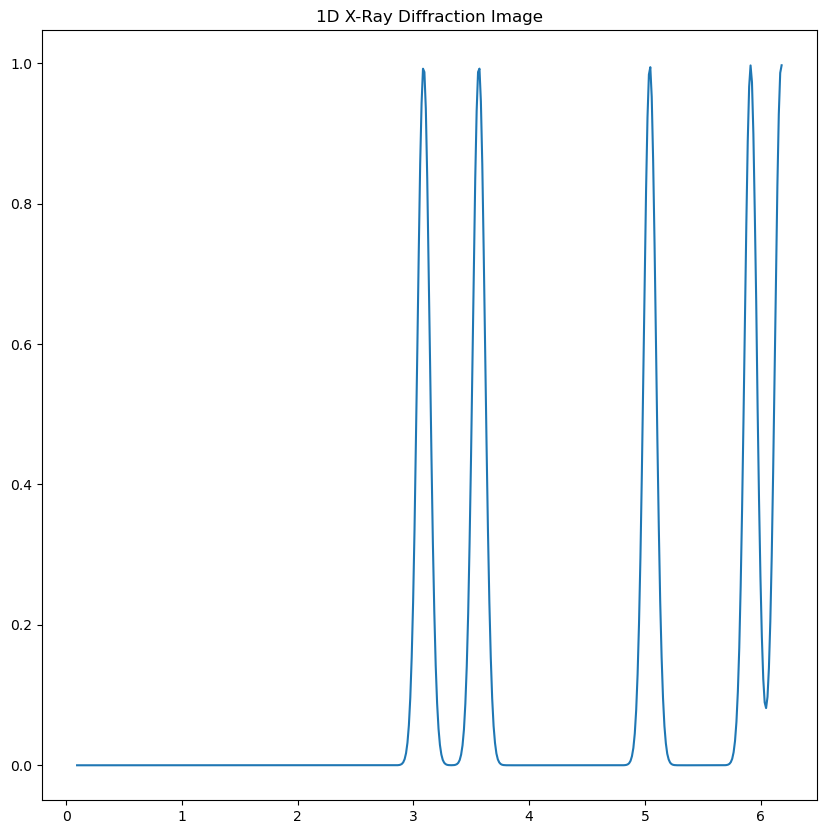

In [5]:
q, integrated_im = sim.integrate_image(thin_film, .4, .5e-10, resolution = 500, mask = mask_two, show = True)
q, integrated_im2 = sim.integrate_image(isotropic_signal, .4, .5e-10, resolution = 500, mask = mask_two, show = True)   

## Improved Rotate and Integrate using GPU (for supercomputer use only)

/home/dalverson/miniconda3/envs/venv/lib/python3.11/site-packages/pyopencl/cache.py:495: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(


image_rotation executed in 0.0327 seconds
image_rotation executed in 0.0355 seconds
image_rotation executed in 0.0384 seconds
image_rotation executed in 0.0427 seconds
image_rotation executed in 0.0448 seconds
image_rotation executed in 0.0449 seconds
image_rotation executed in 0.0467 seconds
image_rotation executed in 0.0476 seconds
image_rotation executed in 0.0500 seconds
image_rotation executed in 0.0470 seconds
image_rotation executed in 0.0467 seconds
image_rotation executed in 0.0469 seconds
image_rotation executed in 0.0488 seconds
image_rotation executed in 0.0494 seconds
image_rotation executed in 0.0498 seconds
image_rotation executed in 0.0501 seconds
image_rotation executed in 0.0509 seconds
image_rotation executed in 0.0504 seconds
image_rotation executed in 0.0503 seconds
image_rotation executed in 0.0507 seconds
image_rotation executed in 0.0526 seconds
image_rotation executed in 0.0590 seconds
image_rotation executed in 0.0623 seconds
image_rotation executed in 0.0681 

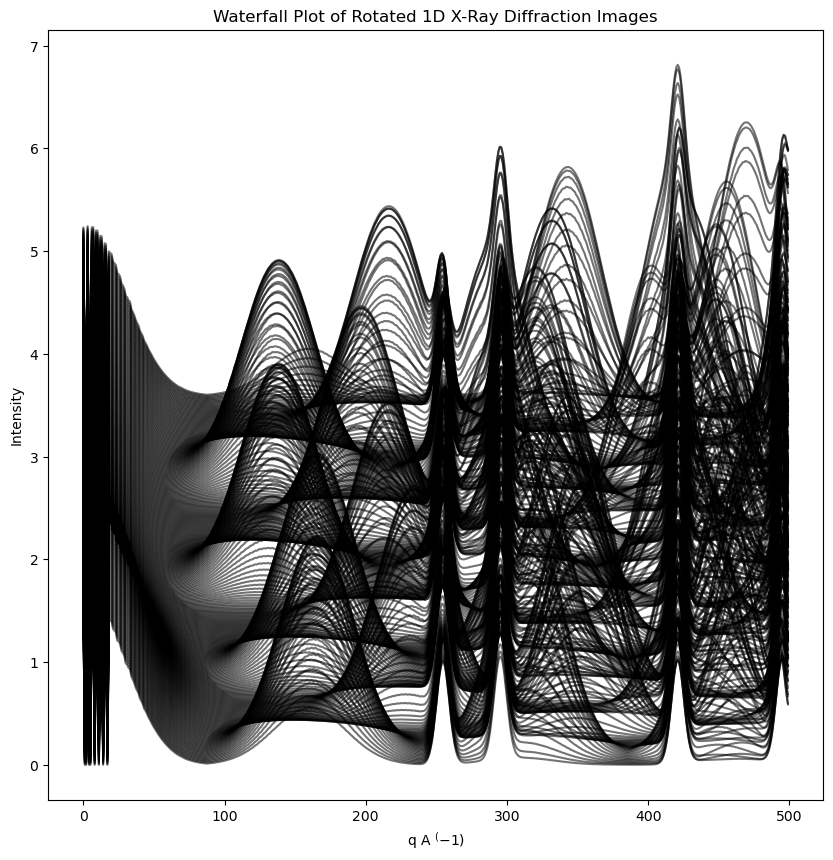

rotate_integrate_image_gpu executed in 24.1320 seconds


In [6]:
rotated_data = iso.rotate_integrate_image_gpu(thin_film, 1, .4, .5e-10, resolution = 500, mask = mask_one)

## Improved NMF algorithm (in reference to time for completion)

Euclidean distance: 2.003
Error tracking:
[36248.6095923898, 36017.58058186627, 35520.90790613752, 34376.256852120816, 31802.034761601564, 26761.744251077816, 19625.991047198346, 13160.407406564229, 8810.896988249635, 5985.232551016293, 4064.7845108374368, 2771.0497235895255, 1929.196137314947, 1389.1357139032236, 1037.3874192835476, 800.8243634481022, 635.983867160939, 517.4192801501375, 429.8737905445863, 363.81820644961357, 313.0396041118413, 273.33742005965047, 241.79401645574305, 216.3441238389475, 195.50556586998624, 178.2025762904703, 163.64609204129985, 151.25115050970172, 140.5793116032216, 131.29824525978609, 123.15317683448683, 115.94655996643324, 109.5234889877775, 103.76114341429405, 98.56108682145981, 93.84360150446867, 89.54348528871914, 85.6069056783567, 81.98902397629736, 78.65218427274641, 75.56452009277031, 72.69887240019624, 70.03194168593187, 67.54361757776222, 65.21644426623675, 63.03519076318158, 60.98650278971965, 59.05861876600965, 57.241136537817056, 55.524820

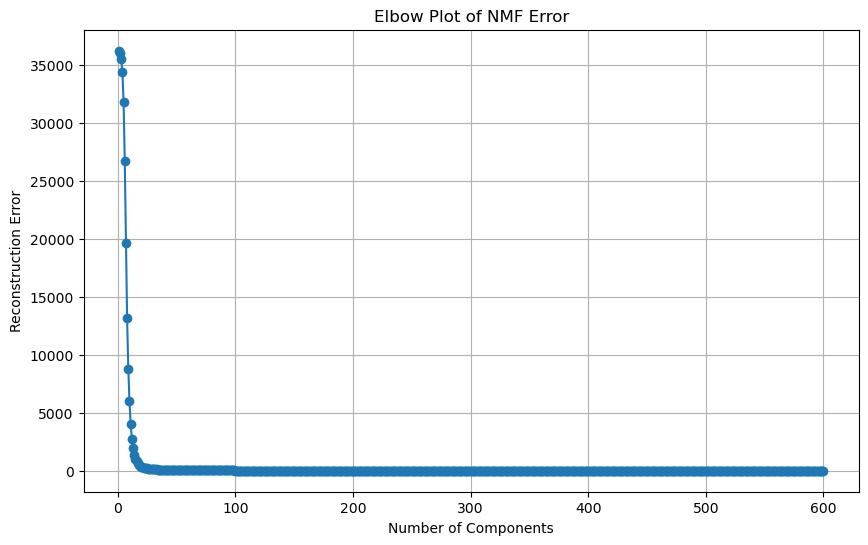

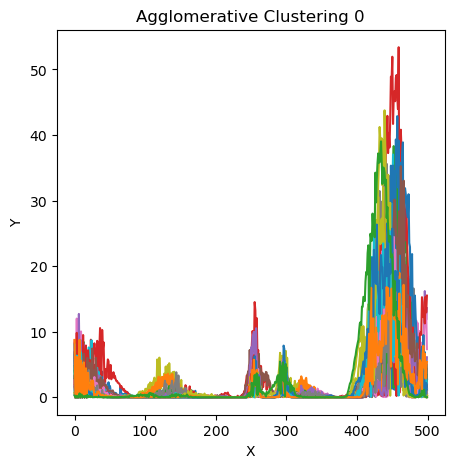

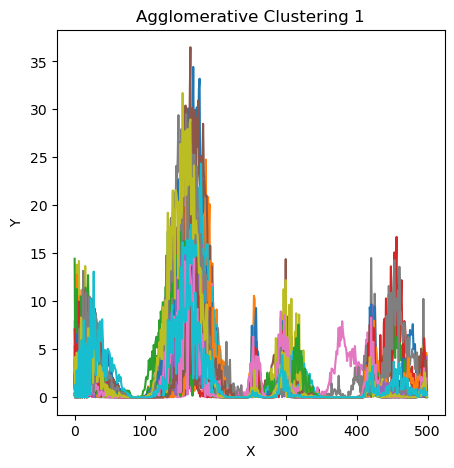

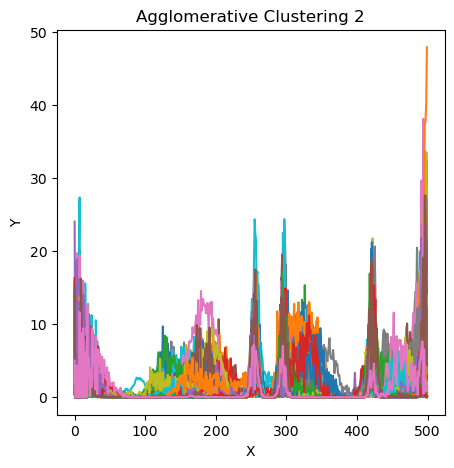

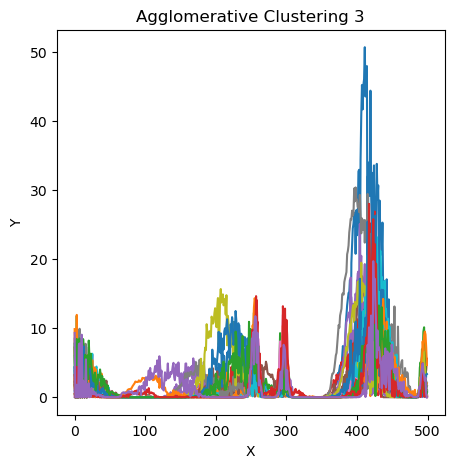

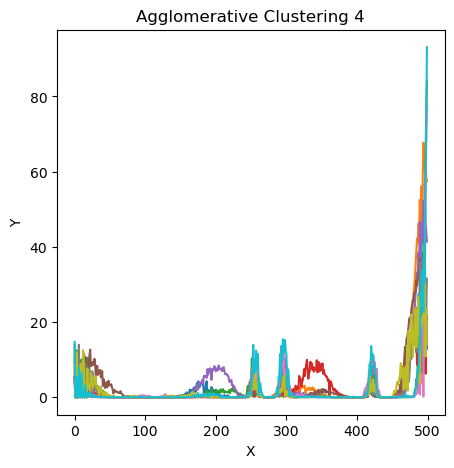

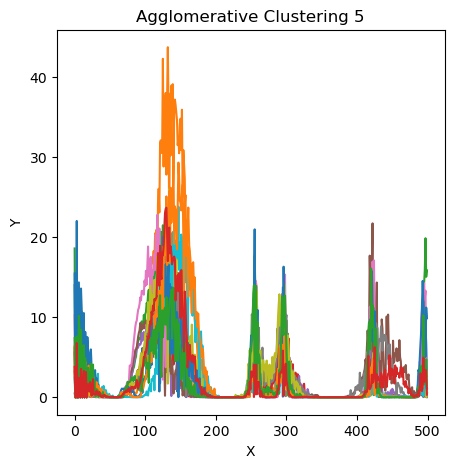

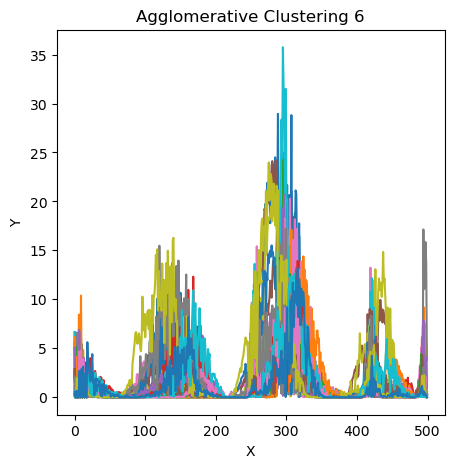

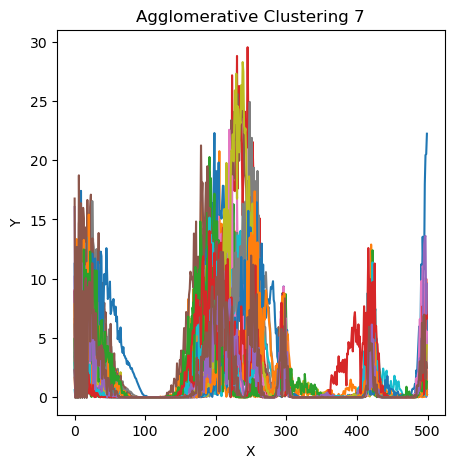

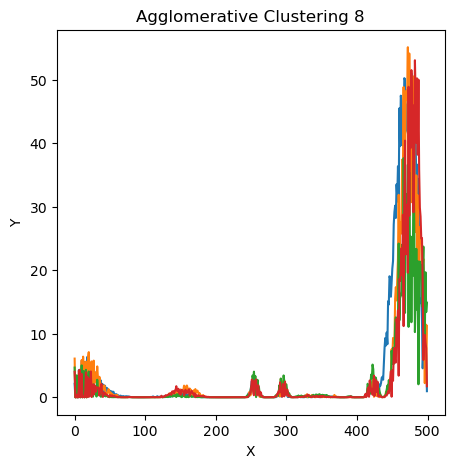

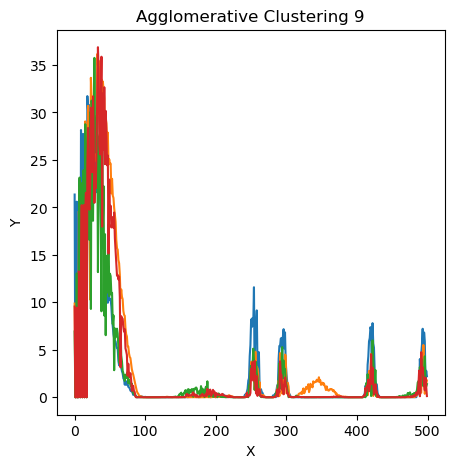

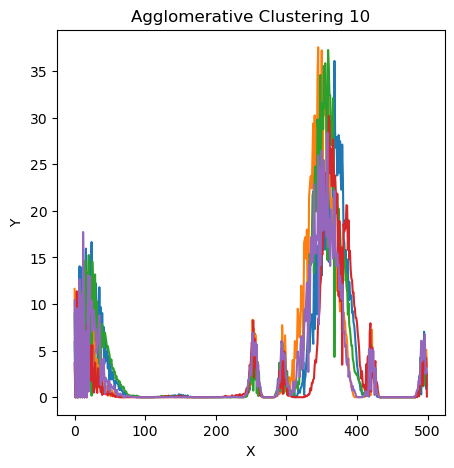

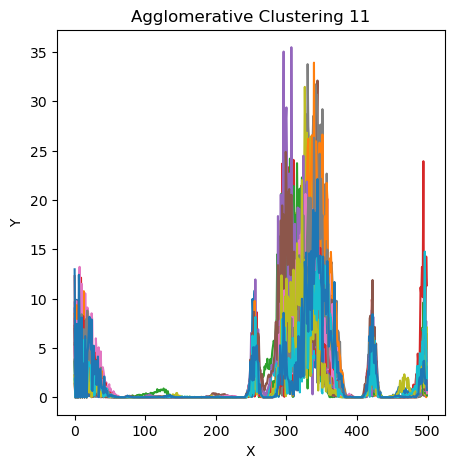

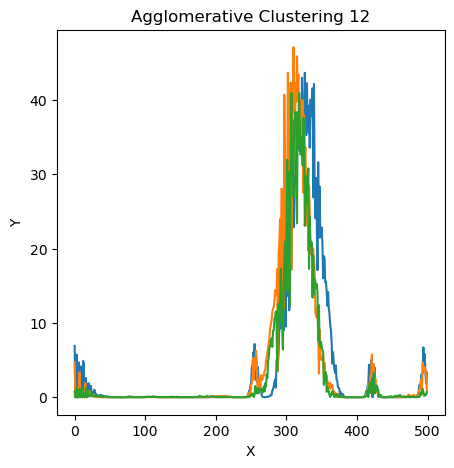

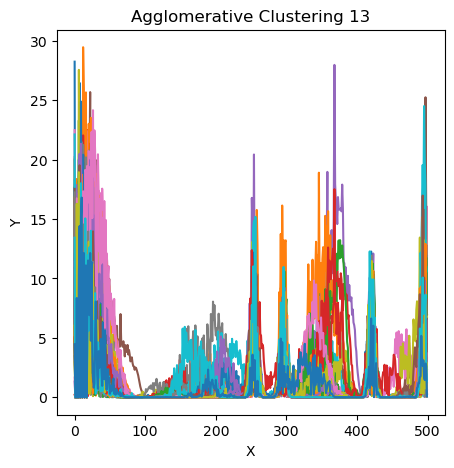

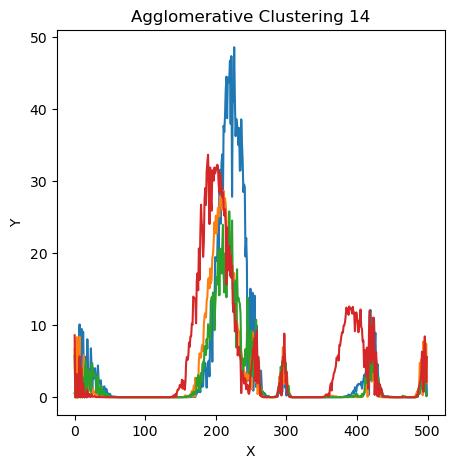

In [7]:
data_dict, iso_signal = iso.run_nmf_and_agg_cluster(np.array(rotated_data), 359, 15)


## Hierarchical Agglomerative Code for IsoDAT2D

In [8]:
def run_HAC(Number_Clusters, data):
    """A program that will take in the type of scikitlearn clustering algorithm
    desired and the number of clusters as well as the data in a numpy array
    and output the associated clusters with the original data. This will make
    the 'latent' space from the clustering algorithms have more meaning"""
    
    # data_list = []
    # i = 0
    # while i < len(basis_data.T)-1:
    #     data_list.append(basis_data[:,i])
    #     i += 1
    # data = np.array(data_list)
    
    # print(data.shape)

    # Initialize and fit the Agglomerative Clustering model
    Make_Clusters = AgglomerativeClustering(n_clusters=Number_Clusters, compute_distances=True)
    y_kmeans = Make_Clusters.fit_predict(data)
    distances = Make_Clusters.distances_

    # Prepare the data for understanding
    Understanding_data = {
        "Cluster_Number": y_kmeans.tolist(),
        "Int_Angle": data.tolist()
    }               
    
    # Create an empty list to store the data
    data_list = []

    # Plot and analyze each cluster
    for q in range(Number_Clusters):
        plt.figure(figsize=(5, 5))
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Agglomerative Clustering {q}')

        for z in range(len(data)):
            if Understanding_data["Cluster_Number"][z] == q:
                plt.plot(Understanding_data["Int_Angle"][z], label=f'Component {z}')
        
        #plt.legend()
        plt.show(block=False)
        plt.pause(0.1)

        if input("Do the identified components look like an isotropic scattering signal? (y/n) ") == 'y':
            for i in range(len(data)):
                if Understanding_data["Cluster_Number"][i] == q:
                    data_list.append(Understanding_data["Int_Angle"][i])

    return Understanding_data, data_list

## Combined NMF and Hierarchical Agglomerative Clustering function used 

In [9]:
from sklearn.preprocessing import StandardScaler

def run_nmf_and_agg_cluster(rotated_data, n_components, n_clusters):
    """A function that will run the NMF algorithm and then cluster with agglomerative clustering the components and returns the
    identified components for later PDF analysis."""
    
    #running nmf algorith and returning the basis, coefficient, and error matricies
    basis, coefficient, err = run_nimfa_nmf(rotated_data, n_components)
    
    print(basis.shape)
    
    #converting the basis matrix to a numpy array and data to input into the agglomerative clustering algorithm
    basis_np = np.array(basis)
    
    data = []
    i = 0
    while i < len(basis_np.T)-1:
        data.append(basis_np[:,i])
        i += 1
    data_np = np.array(data)
    
    scaled_data = StandardScaler().fit_transform(data_np)
    
    #plotting error from the nmf run
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(err) + 1), err, marker='o')
    plt.title('Elbow Plot of NMF Error')
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error')
    plt.grid(True)
    plt.show()
    
    #running the returned basis matrix through the agglomerative clustering algorithm
    all_data, found_comps = run_HAC(n_clusters, scaled_data)
    
    return all_data, found_comps

## Using DBScan

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Perform DBSCAN clustering on the NMF components
def dbscan_clustering(components, eps=0.6, min_samples=4):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric = 'l2')
    scaled_components = StandardScaler().fit_transform(components)
    clusters = dbscan.fit_predict(scaled_components)
    return clusters

## Using HDBScan

In [11]:
from sklearn.cluster import HDBSCAN


# Perform DBSCAN clustering on the NMF components
def hdbscan_clustering(components, min_cluster_size = 2, max_cluster_size = None, cluster_selection_epsilon = 10):
    hdbscan = HDBSCAN(cluster_selection_epsilon=cluster_selection_epsilon, min_cluster_size = min_cluster_size, max_cluster_size = max_cluster_size, allow_single_cluster = True, min_samples = 1)
    scaled_components = StandardScaler().fit_transform(components)
    clusters = hdbscan.fit_predict(scaled_components)
    return clusters, scaled_components

## How to visualize the clustered data

In [12]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.signal import savgol_filter
import numpy as np

def plot_dbscan(clustered_data):

    # Create a dictionary to hold the components for each cluster
    clustered_components = {}

    # Iterate over the clusters and components
    for cluster_label, component in zip(clustered_data, data):
        if cluster_label not in clustered_components:
            clustered_components[cluster_label] = []
        clustered_components[cluster_label].append(component)

    # Number of clusters
    num_clusters = len(clustered_components)

    # Create figure and gridspec to have two plots per row (left: components, right: mean/original)
    fig = plt.figure(figsize=(16, 8 * num_clusters))
    fig.suptitle("Clustered Components", fontsize=20)
    gs = GridSpec(num_clusters, 2, figure=fig)  # num_clusters rows, 2 columns

    # Plot the components and the mean/original data side by side for each cluster
    for i, (cluster_label, components) in enumerate(clustered_components.items()):
        # Left subplot (basis components)
        ax_left = fig.add_subplot(gs[i, 0])
        ax_left.set_title(f"Cluster {cluster_label} - Components")
        for component in components:
            ax_left.plot(savgol_filter(component, 11, 3))  # Plot individual components
        
        # Right subplot (mean and original data)
        ax_right = fig.add_subplot(gs[i, 1])
        ax_right.set_title(f"Cluster {cluster_label} - Mean and Original Data")
        ax_right.plot(savgol_filter(np.mean(components, axis=0), 21, 3) + 10, label='Mean Component', c='r', marker='.', alpha=0.5)
        #ax_right.plot(pure_int * 5 + 10, label='Original Data', c='b', marker='.', alpha=0.5)
        ax_right.legend()

    # Adjust layout to prevent overlap
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [20]:
data_dict.keys()

dict_keys(['Cluster_Number', 'Int_Angle'])

In [22]:
cluster = dbscan_clustering(data_dict["Int_Angle"], eps=0.6, min_samples=4)

In [26]:
print(np.array(data_dict["Int_Angle"]).shape)

(358, 500)
